In [17]:
import numpy as np
import matplotlib.pyplot as plt

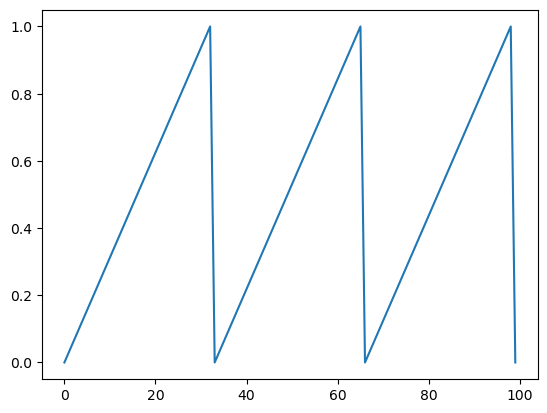

In [25]:
N = 100
t = np.linspace(0, 1, N+1)[0:N]
T = N//3
x = np.arange(N) % T
x = x/np.max(x)
plt.plot(x)

/tmp/ipykernel_9571/4114822624.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


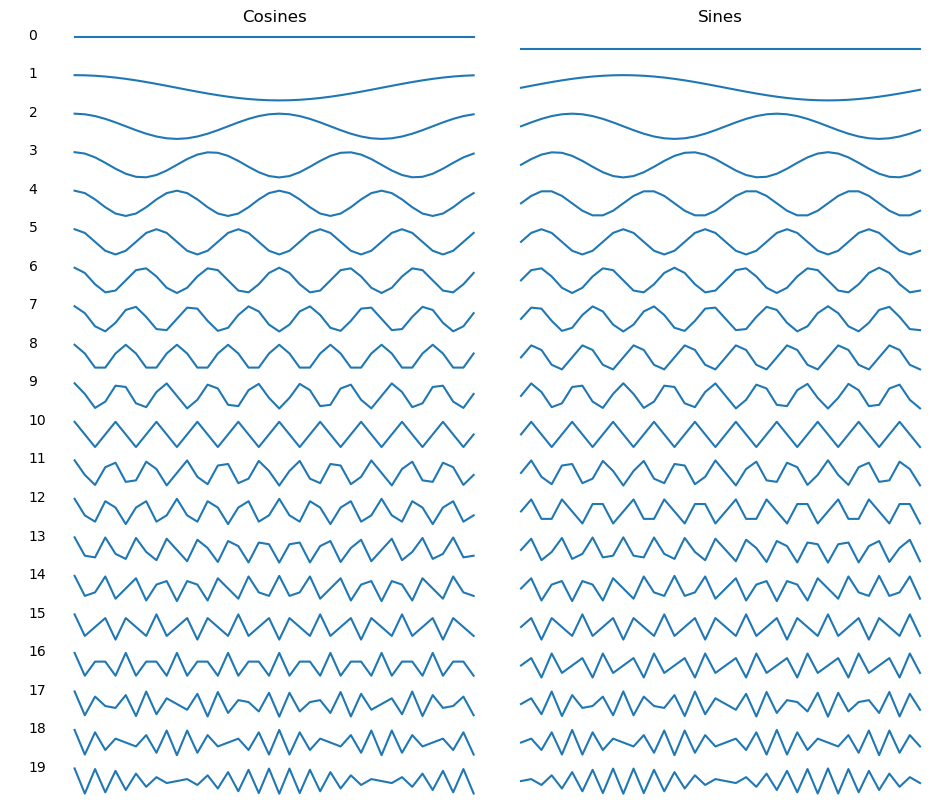

In [2]:
def make_plots(N):
    plt.figure(figsize=(12, 20))
    n_freqs = int(np.ceil(N/2))
    for i in range(n_freqs):
        t = np.linspace(0, 1, N+1)[0:N]
        c = np.cos(2*np.pi*i*t)
        s = np.sin(2*np.pi*i*t)
        plt.subplot2grid((N*10, 21), (i*10, 0), rowspan=10, colspan=1)
        plt.axis('off')
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.text(0, 0.5, "{}".format(i))
        plt.subplot2grid((N*10, 21), (i*10, 1), rowspan=10, colspan=10)
        plt.plot(c)
        plt.ylim(-1.5, 1.5)
        plt.axis('off')
        if i == 0:
            plt.title("Cosines")
        plt.subplot2grid((N*10, 21), (i*10, 11), rowspan=10, colspan=10)
        plt.plot(s)
        plt.ylim(-1.5, 1.5)
        plt.axis('off')
        if i == 0:
            plt.title("Sines")
    plt.tight_layout()


def dft(x):
    N = len(x)

make_plots(40)
plt.savefig("Modes40.svg", bbox_inches='tight')

In [3]:
def get_dft(x):
    N = len(x)
    t = np.linspace(0, 1, N+1)[0:N]
    n_freqs = int(np.ceil(N/2))
    cos_sums = np.zeros(n_freqs)
    sin_sums = np.zeros(n_freqs)
    for i in range(n_freqs):
        s = np.sin(2*np.pi*i*t)
        c = np.cos(2*np.pi*i*t)
        cos_sums[i] = np.sum(c*x)
        sin_sums[i] = np.sum(s*x)
    return cos_sums, sin_sums

<StemContainer object of 3 artists>

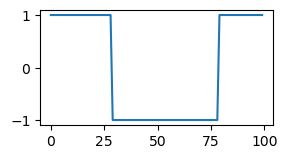

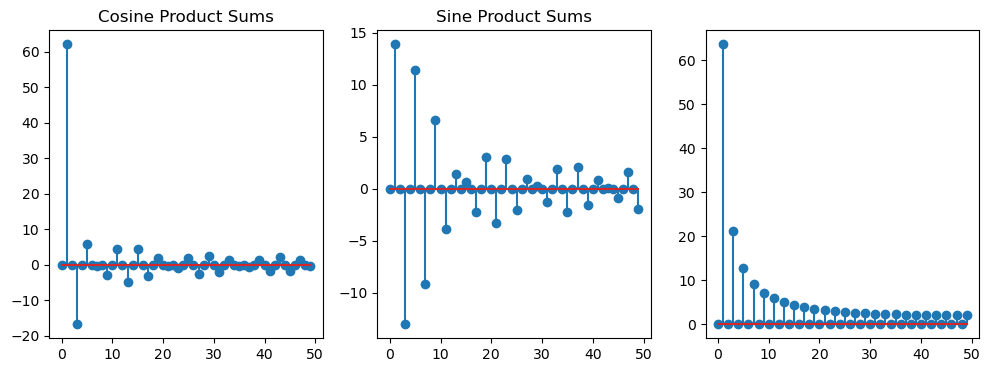

In [47]:
N = 100
t = np.linspace(0, 1, N+1)[0:N]
s = 0.6
#x = np.sin(2*np.pi*f*t - 2*np.pi*f*s)
#x = np.arange(N)

#T = N/4
#x = np.arange(N) % T
#x = x/np.max(x)
#x = x - np.mean(x) # Subtract off mean of every sample

f = 1
x = np.sign(np.cos(2*np.pi*f*t - 0.2))
plt.figure(figsize=(3, 1.5))
plt.plot(x)


c, s = get_dft(x)
amps = np.sqrt(c**2 + s**2)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.stem(c)
#plt.ylim([-N, N])
plt.title("Cosine Product Sums")
plt.subplot(132)
plt.stem(s)
#plt.ylim([-N, N])
plt.title("Sine Product Sums")
plt.subplot(133)
plt.stem(amps)
#plt.ylim([0, 2*N])

#plt.savefig("OnePeriod.svg", bbox_inches='tight')

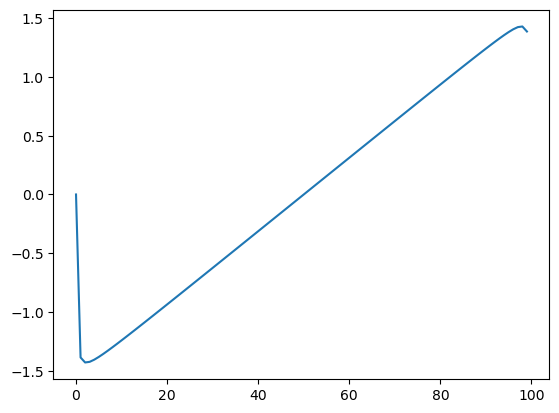

In [36]:
y2 = np.zeros_like(t)
f = 1
for i in range(1, 100):
    y2 -= np.sin(2*np.pi*f*i*t)/i
plt.plot(y2)

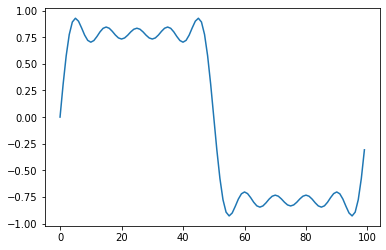

In [54]:
y = np.zeros_like(t)
for i in range(1, 10, 2):
    y += np.sin(2*np.pi*i*t)/i
plt.plot(y)